<!-- #Here is my new ML Project based on Stock price of S and P.
#Different ML models will be used for data analysis and visualization.
#Programming Language: Python
#IDE: VSCode
#Dataset: Sand P500.csv (Kaggle.com)
 -->


<!-- 1. Understanding the data set and cleaning the dataset -->

In [ ]:
#Import all the important libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#Check the rows, columns, datatypes of the dataset

df=pd.read_csv(".\sp500_companies.csv")

#Here we can get the general view of the dataset
print(df.head())
print(df.info())
print(df.columns)
#check the column name data types. Here is an example of Current price
print(df.Currentprice.dtype)

print(df.Currentprice.duplicated())


Basic Operations performed: 
Calculate the important values of Mean, median, Mode
1. Mean- The average Value of the current price, 
2. Median- The midpoint value of the current price, 
3. Mode: The most common value of the current price  
4. Standard Deviation: A number that describes how spread out the values of the current price.

<!-- # Calculate the important values of Mean, median, Mode
1. Mean- The average Value, 
2. Median- The midpoint value, 
3. Mode: The most common value  
4. Standard Deviation: A number that describes how spread out the values.-->

In [ ]:
#Mean of the current price in the S and P dataset

Mean=df['Currentprice'].mean()
#The average of the S and P 500 share price
print('Mean=',Mean)

# The median of the S and P 500 share price
Median=df['Currentprice'].median()
print('Median=',Median)

# The Mode of the S and P 500 share price
Mode=df['Currentprice'].mode()
print('Mode=',Mode)

#The standard deviation of the Current price of the S and P dataset
Std=df['Currentprice'].std()
print('Standard Deviation=',Std)

Machine Learning Models
Linear regression. Lets check if there is a positive relation between Current price and Marketcap.

<!-- Linear regression of the  S and P dataset 
In order to test out linear regression lets check slope, 
-->

In [ ]:
current_price=df['Currentprice']
Market_cap=df['Marketcap']
slope,intercept, r, p, std_err=stats.linregress(current_price,Market_cap)
print('Slope=',slope)
print('intercept=',intercept)
print('r=',r)
print("p=",p)
print("std_err=",std_err)




Let us check if this model is appropriate to relation between Current price and market cap.

In [ ]:
#Polynomial Regression
current_price=df['Currentprice']
Market_cap=df['Marketcap']
poly_model=np.poly1d(np.polyfit(current_price,Market_cap,3))
print("Polynomial Regression r2 score=", r2_score(Market_cap, poly_model(current_price)))

Predicting the market capitalization based on current price and sector using linear regression and Label Encoding.

In [ ]:
label_encoder=LabelEncoder()
df['Sector']=label_encoder.fit_transform(df['Sector'])
X=df[['Currentprice','Sector']]
Y=df['Marketcap']
model=linear_model.LinearRegression()
model.fit(X,Y)
v1=247.77
v2=3

prediction=pd.DataFrame([[v1,v2]],columns=['Currentprice','Sector'])
prediction_ans=model.predict(prediction)
df['Sector']=label_encoder.inverse_transform(df['Sector'])
decoded=label_encoder.inverse_transform([v2])[0]
print(f"The predicted market price for the current price of {v1} in the {decoded} industry is: {int(prediction_ans)}")


Visualizing the market share distribution of the top 5 technology companies based on market capitalization sector using a pie chart.

<Axes: title={'center': 'Market Share of Top Technology Companies'}, ylabel='Marketcap'>

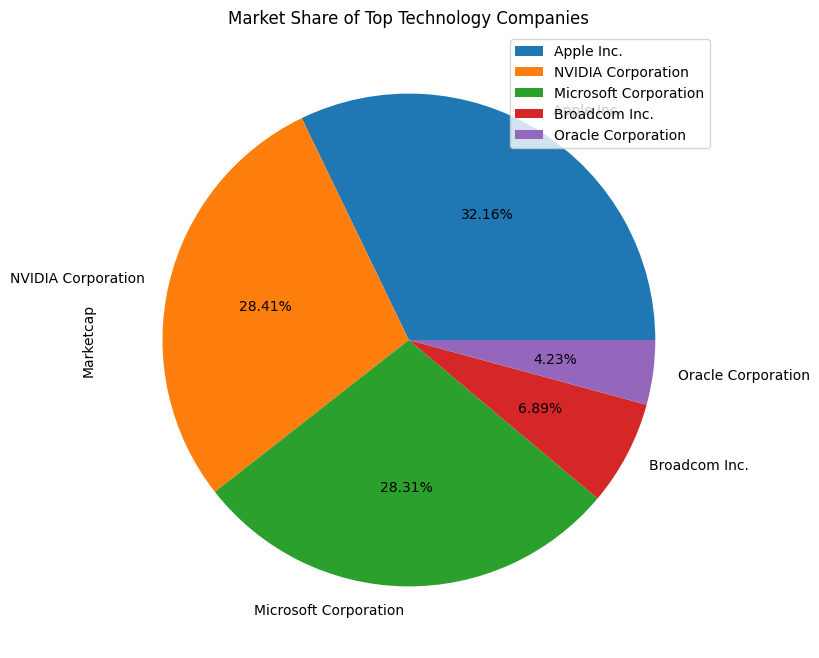

In [ ]:
Tech_Market=df[df['Sector']=='Technology']
top_companies=Tech_Market.nlargest(5, 'Marketcap')
top_companies.plot(kind='pie',y='Marketcap',labels=top_companies['Shortname'], autopct='%2.2f%%', figsize=(8, 8), title="Market Share of Top Technology sector Companies")
